# PYTHON WAFFLE CHARTS WITH PYWAFFLE

### Waffle charts typically resemble a waffle pattern and provide a way to visualize and compare the size and distribution of data. Often, the number of squares in a waffle chart are scaled down.

# DOCUMENTATION
visit python package index and search for pywaffle

In [13]:
from IPython.display import IFrame
documentation = IFrame(src='https://pywaffle.readthedocs.io/en/latest/', width=1000, height=450)
display(documentation)

# IMPORTS

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from vega_datasets import data as vds
from pywaffle import Waffle

# BASIC EXAMPLE

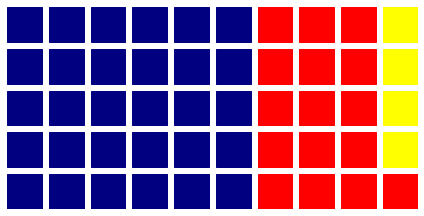

In [3]:
# specify rows and columns (at least one of rows and columns is required)
# numbers assigned to the rows and columns can affect the scaling, etc.
# colors can also use colormap
fig = plt.figure(FigureClass=Waffle,
                 rows=5,
                 columns=10,
                 values=[30, 16, 4],
                 colors=['navy', 'red', 'yellow'])
# fig.show()

# CHANGE SHAPE
waffle chart shapes can be changed with assigning different characters or icons

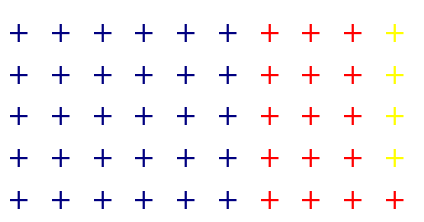

In [15]:
fig = plt.figure(FigureClass=Waffle,
                 rows=5,
                 columns=10,
                 values=[30, 16, 4],
                 characters='+',
                 # icons='star',
                 colors=['navy', 'red', 'yellow'])

# add text
# fig.text(x=0.25, y=0.5, s='Add Text', fontsize=50, color='blue')

# EXAMPLES USING DATAFRAME

### CARS

In [5]:
cars = vds.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [6]:
# create dictionary with key value pairs for waffle chart values
cylinders = dict(cars.Cylinders.value_counts())
cylinders

{4: 207, 8: 108, 6: 84, 3: 4, 5: 3}

In [7]:
# labels with percents for legend
percent = dict(cars.Cylinders.value_counts(normalize=True))
labels = [f'{k} cylinders: {v*100:.1f}%' for k,v in percent.items()]
labels

['4 cylinders: 51.0%',
 '8 cylinders: 26.6%',
 '6 cylinders: 20.7%',
 '3 cylinders: 1.0%',
 '5 cylinders: 0.7%']

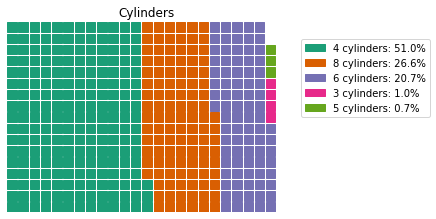

In [16]:
# waffle chart
fig = plt.figure(FigureClass=Waffle,
                 columns=25,
                 values=cylinders,
                 legend={'loc': (1.05, 0.5), 'labels': labels},
                 title={'label': 'Cylinders'},
                 cmap_name='Dark2')

### BIRDSTRIKES

In [9]:
# birdstrikes dataframe
birdstrikes = pd.read_csv('https://raw.githubusercontent.com/vega/vega-datasets/master/data/birdstrikes.csv')
birdstrikes.head()

,Airport Name,Aircraft Make Model,Effect Amount of damage,Flight Date,Aircraft Airline Operator,Origin State,Phase of flight,Wildlife Size,Wildlife Species,Time of day,Cost Other,Cost Repair,Cost Total $,Speed IAS in knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1990-01-08,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1990-01-09,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1990-01-11,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1990-01-11,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1990-01-12,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


In [10]:
# create dictionary with key value pairs for waffle chart values
bird_counts = dict(birdstrikes['Wildlife Species'].value_counts())
bird_counts

{'Unknown bird - small': 3572,
 'Unknown bird - medium': 3372,
 'Unknown bird or bat': 629,
 'Unknown bird - large': 436,
 'European starling': 319,
 'Rock pigeon': 232,
 'Mourning dove': 217,
 'Canada goose': 190,
 'Red-tailed hawk': 100,
 'Ring-billed gull': 87,
 'American kestrel': 83,
 'Pacific golden-plover': 65,
 'Killdeer': 64,
 'Mallard': 63,
 'American robin': 62,
 'Herring gull': 52,
 'Barn owl': 47,
 'American crow': 41,
 'Barn swallow': 38,
 'White-tailed deer': 34,
 'Turkey vulture': 33,
 'Eastern meadowlark': 30,
 'Laughing gull': 29,
 'Coyote': 26,
 'Zebra dove': 25,
 'Great blue heron': 25,
 'Horned lark': 22,
 'Western meadowlark': 19,
 'Cattle egret': 16,
 'Tree swallow': 14,
 'Cliff swallow': 13,
 'Meadowlarks': 10,
 'Blackbirds': 10,
 'Short-eared owl': 9,
 'Chimney swift': 7,
 'Common nighthawk': 6,
 'Savannah sparrow': 3}

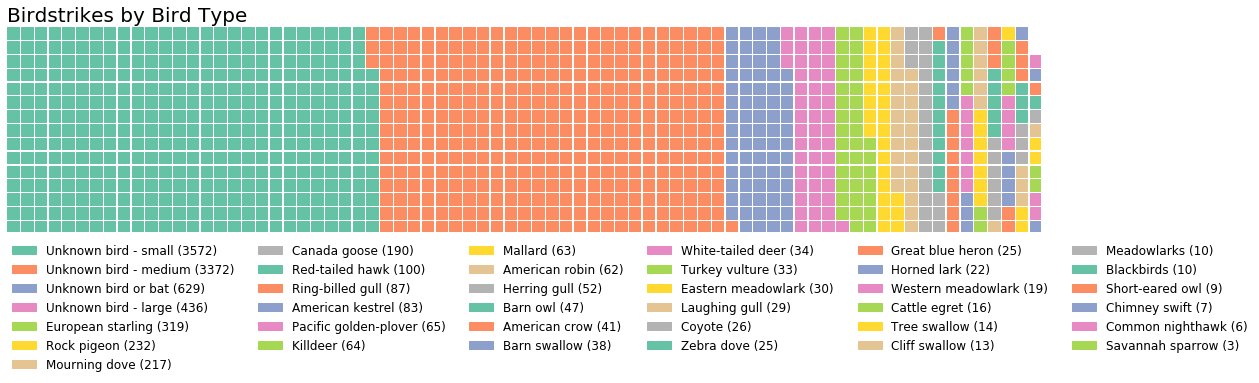

In [17]:
# waffle chart
fig = plt.figure(FigureClass=Waffle,
                 figsize=(18,8),
                 rows=15,
                 columns=75,
                 values=bird_counts,
                 title={'label': 'Birdstrikes by Bird Type', 'loc': 'left', 'fontdict': {'fontsize': 20}},
                 labels=['{0} ({1})'.format(k, v) for k, v in bird_counts.items()],
                 legend={'loc': (0, -0.7), 'ncol': 6, 'fontsize': 12, 'framealpha': 0})

Additional Options Include:
* Use rounding_rule argument to change scaling
* Block shape can be changed with block_aspect_ratio argument
* Block spacing can be changed with interval_ratio_x and interval_ratio_y arguments
* Where to start first block can be changed with starting_location argument (options-NW, SW, NE, SE)
* Plotting direction can be changed with vertical argument (vertical=True)
* Where to start each category can be changed with block_arranging_style argument (block_arranging_style='snake' or 'new-line')
* Subplots